# Diffusion Measures from Jackson (2020) paper

In this notebook we try to reproduce the diffusion measures presented in the Jackson et. al. paper (2020). In this paper Jackson breaks down the term _"social capital"_ into seven more fundamental forms of capital: information capital, brokerage capital, coordination and leadership capital, bridging capital, favor capital, reputation capital, and community capital. 


### **Information capital**
Related to **information capital** (or the ability to acquire valuable information and/or to spread it to other people who can use it through social connections) Jackson presents three diffusion mesures:

**Decay centrality**:

It counts paths of different lengths—so how many people one can reach at different distances—and weights them by their distance.

$$ \text{Dec}_i(\textbf{g},p,T) = \sum_{l=1}^T p^l|N_i^l(g)| $$

Here, the parameter $p$ captures the decay of information with distance, $T$ caps the number of time that information is relayes, and $|N_i^l(g)|$ denotes the number of nodes at distance $l$ from node $i$.

An advantage of decay centrality is that it is easy to measure. A disadvantage of decay centrality is that it does not account for the fact that in some settings it is easier to reach any other given person, either in sending or receiving information, if there are many independent paths to that person. Multiple paths can increase the chance that the information makes it from one node to another. This was the motivation behind the concept of communication centrality:

**Communication centrality**:

Define $\text{PInf}(\textbf{p}, T )_{ij}$ to be the probability that node $j$ ends up hearing information that starts from node $i$ if it is passed independently with probability $p_{i′ j′}$ from node $i′$ to $j′$ along each walk in the network, and running the whole process for $T$ periods. Then:

$$ \text{Com}_i(\textbf{p},T) = \sum_{j}\text{PInf}(\textbf{p},T)_{ij} $$

Here **p** is a $n × n$ weighted and directed network with $ij$-th entry being the probability that $i$ passes information to $j$ in a given time period. A special case is in which $p_{ij}$’s are identical for all $ij$ and then $p$ becomes p$g$, where p is a scalar and $g$ is an adjacency matrix taking on values {0, 1}. 

Communication centrality involves some simulation to calculate, as one needs to account for all the possible paths that information might take, and some end up overlapping, producing correlation in the chance that information makes it from one node to another. That's why in their original paper Banejeree et. al. (2013) propose another measure in the spirit of communication centrality that does not require estimation of the model and yet can still serve as a proxy for communication centrality: diffusion centrality.

**Diffusion centrality**:

Define $\text{EInf}(\textbf{p}, T )_{ij}$ as the expected number of times that $j$ will hear information that starts at node $i$ and is passed according to the matrix $p$ for $T$ periods. $\text{EInf}$ differs from $\text{PInf}$ by counting multiple hearings, and so can be greater than 1, while $\text{PInf}$ is just a probability of ever hearing. Then:


$$\text{Diff}_i(\textbf{p},T) = \sum_{j}\text{EInf}(\textbf{p},T)_{ij} = \sum_j\sum_{l=1}^T[\textbf{p}^l]_{ij}$$

### **Brokerage, coordination, and leadership capital**

**Brokerage capital** is being in a position to serve as an intermediary between others who need to interact or transact. **Coordination and leadership capital** relates to being situated as a ‘friend-in-common’ to others who cannot coordinate their actions directly, and thus being in a position to coordinate others’ behaviors. 

For this two capital indexes, Jackson presents a new diffusion measure called the Godfather Index.

**Godfather index**:
The basic idea is to measure brokerage and coordination capital by the number of pairs of a person’s friends who are not friends with each other:

$$GF_i(g) = \sum_{k > j} g_{ik} g_{ij} (1 - g_{kj}) = \left| \{ k \neq j : g_{ik} = g_{ij} = 1, g_{kj} = 0 \} \right|$$

**Creating the toy network (unweighted and undirected)**

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
# from utils.utils import plot_graph
import random


G = nx.barabasi_albert_graph(25, 2)

# # add random weights
# for (u,v,w) in G.edges(data=True):
#     w['weight'] = random.random()

# plot_graph(G, "Graph")
# # Print some basic information about the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Graph has {num_nodes} nodes and {num_edges} edges.")

Graph has 25 nodes and 46 edges.


In [6]:
from jackson_metrics import decay_centrality, communication_centrality, diffusion_centrality, Godfather

p = 0.5
T = 2

decay_centrality = decay_centrality(G, p, T)
diffusion_centrality = diffusion_centrality(G, T)
godfather_index = Godfather(G)

Godfather index:: 100%|███████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 6481.49it/s]


T = 2, p = 0.5



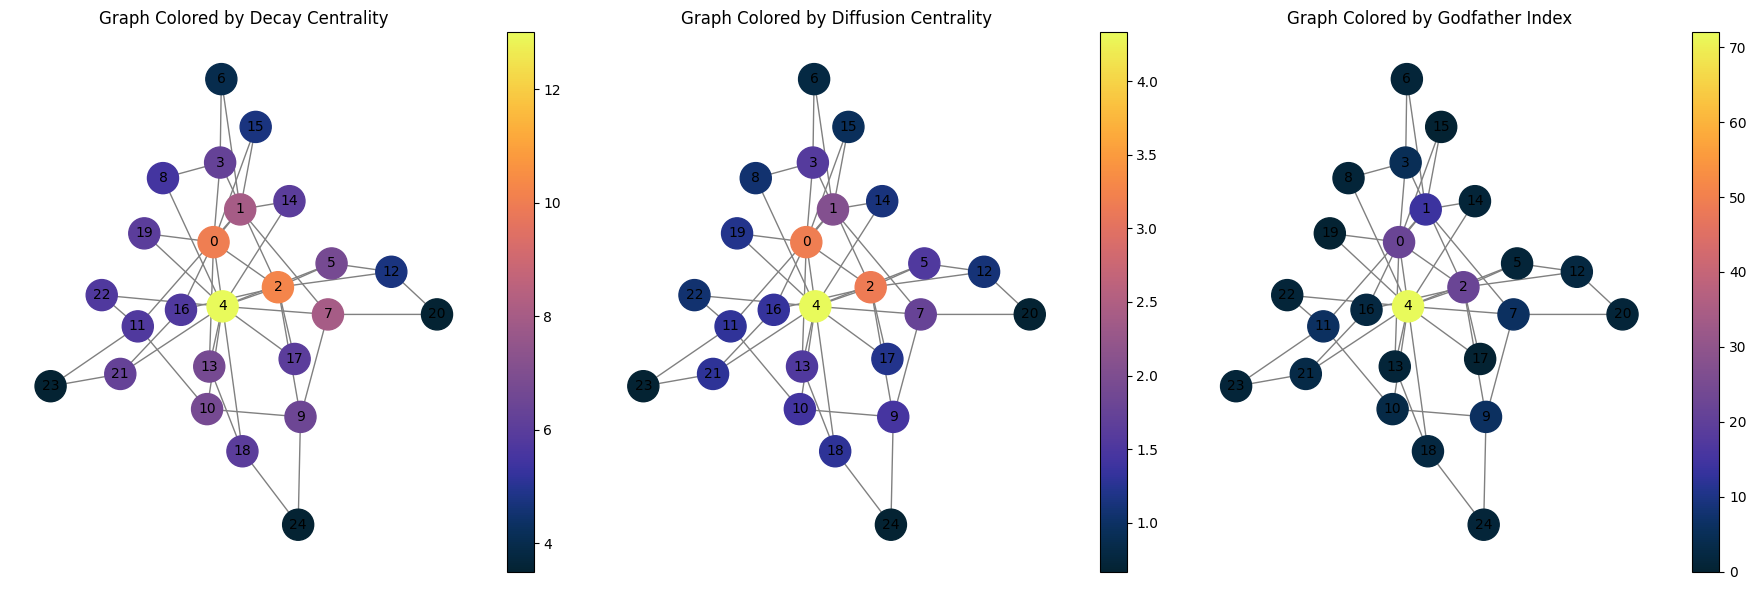

In [7]:
import cmocean

print(f"T = {T}, p = {p}\n")
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

cmap = cmocean.cm.thermal

# Graph Colored by Decay Centrality
pos = nx.spring_layout(G, seed=20)
node_color = [decay_centrality[node] for node in G.nodes]
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, node_size=500, ax=axs[0])
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', ax=axs[0])
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', ax=axs[0])
fig.colorbar(nodes, ax=axs[0])
axs[0].set_title("Graph Colored by Decay Centrality")
axs[0].axis('off')

# Graph Colored by Diffusion Centrality
node_color = [diffusion_centrality[node] for node in G.nodes]
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, node_size=500, ax=axs[1])
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', ax=axs[1])
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', ax=axs[1])
fig.colorbar(nodes, ax=axs[1])
axs[1].set_title("Graph Colored by Diffusion Centrality")
axs[1].axis('off')

# Graph Colored by Godfather index
node_color = [godfather_index[node] for node in G.nodes]
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, node_size=500, ax=axs[2])
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', ax=axs[2])
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', ax=axs[2])
fig.colorbar(nodes, ax=axs[2])
axs[2].set_title("Graph Colored by Godfather Index")
axs[2].axis('off')

plt.tight_layout()
plt.show()